## SVM Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [7]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [8]:
plt.style.use(['science','notebook','grid'])

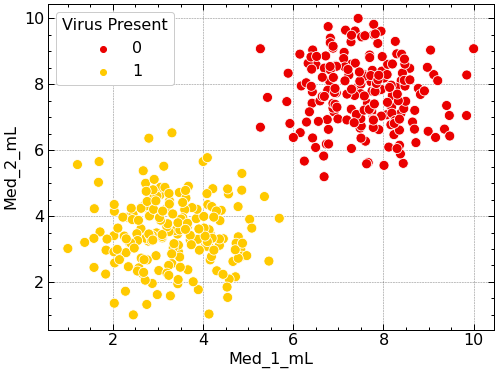

In [9]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL',hue='Virus Present', data =df, s=100, cmap='bwr', palette='hot');

In [10]:
X = df.drop('Virus Present', axis = 1) 
y = df['Virus Present']

## Train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.3, random_state=42)

## Scaler data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler =StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaler = scaler.transform(X_train)

In [17]:
X_test_scaler = scaler.transform(X_test)

## SVM

In [18]:
from sklearn.svm import SVC

In [19]:
model = SVC()

In [20]:
model.fit(X_train_scaler, y_train)

SVC()

In [21]:
base_pred = model.predict(X_test_scaler)

## Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

In [23]:
MAE = mean_absolute_error(y_test, base_pred)
MAE

0.0

In [24]:
MSE = mean_squared_error(y_test, base_pred)
MSE

0.0

In [25]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Hypertuning GridSearchCV

In [26]:
svc = SVC()

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1,2, 10, 100],
             'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree' : [2,3,4],
             'gamma' : ['auto','scale']}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid_search = GridSearchCV(svc, param_grid)

In [30]:
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 10, 100],
                         'degree': [2, 3, 4], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [31]:
grid_search.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [32]:
grid_search.best_estimator_

SVC(C=0.01, degree=2, gamma='auto', kernel='linear')

In [33]:
grid_search.best_score_

1.0

In [34]:
grid_pred = grid_search.predict(X_test_scaler) 

## Evaluation

In [35]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Plot SVM baundary and margins from GridSearchCV best estimator

In [36]:
def plot_svm_boundary(model, X, y):
    X = df.drop('Virus Present', axis = 1).values 
    y = df['Virus Present'].values
    
    # scatter plot
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=30)
    
    # plot evaluation baoundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX,YY = np.meshgrid(xx,yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # create grid boundary and margins
    
    ax.contour(XX,YY,Z, colors='k', alpha=0.5, levels=[-1, 0, 1], linestyles=['--','-','--'])
    
    # plot support vector machines
    
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=120, facecolors='none', linewidth= 0.8,
              edgecolors='k')
    plt.xlabel('Med 1 mL ')
    plt.ylabel('Med 2 mL ')
    plt.title('Plot SVM')
    plt.show()
    

In [37]:
model = SVC(C=0.01, degree=2, gamma='auto', kernel='linear')

In [38]:
model.fit(X,y)

SVC(C=0.01, degree=2, gamma='auto', kernel='linear')

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


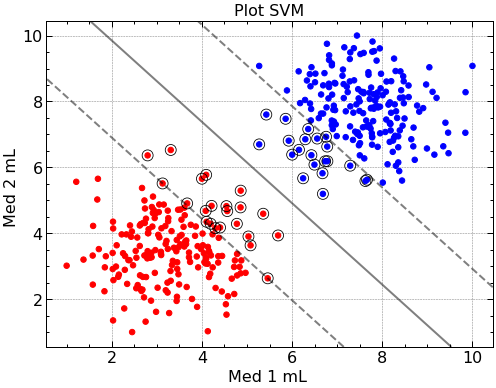

In [39]:
plot_svm_boundary(model, X, y)